 # Talkin' Bout Heroes, Villians, and Other Comic Book Characters
<br>
<div>
    <img src="https://d1466nnw0ex81e.cloudfront.net/n_iv/600/611393.jpg" align="center" width="400"/>
    </div>
<br>

# The Project

<br>
Like all art, comic books can sometimes reflect the attitude of the times by their storylines, art style, and their characters. And like art, there can often be themes found within certain eras of comic book series that reflect what is happening in the world at the same time. The data provided for this project is based on a file of superheroes and villians from both the DC and Marvel Universe by fivethirtyeight.com. This project was really looking to see what kind of information the data could give us if we asked a few specific questions, and then ask further questions based on those results. 

The larger overarching questions were framed around the "alignment" of characters, whether they were a superhero, a villian, or something in between, as well as their gender. Some of the more specific questions that came out of the results of the overarching queries were the timeframe (such as month of first appearance and year of first appearance) and the Universe (Marvel or DC) the characters belong to. 

The data file is from 2014, and because it is 2020, there have been many additions and further appearances by characters that are not included in the original data file used for this project. Some of the data also includes "ND", which represents there being 'No Data' for that particular value. Because some of the questions that are being asked include counting values, the ND data needed to be removed as well as the values that represented such a small amount comparitively to the other results (such as percentage of genders and their alignments). 
<br>
# The Thought Behind It
<br>
When I think about the the queries that came from this project, they remind me of how "Jeopardy!" works. Alex Trebek (RIP) would give you the "answer" to a question, and the contestants had to come up with the correct "question" that would've been asked to get the "answer." It was a unique way of making a gameshow interesting, but it also showed that sometimes the answers can come before the questions, making it important to know how to ask something correctly. 

We know data about comicbook characters exists, we know there are superheroes, we know there are villians, we know they've been born, have died, been resurrected, and many number of other things. What was involved in this project was knowing what to ask of the data within the parameters of the mechanism. What I'm asking of the data includes being able to compare and link data within itself and to other points. The actual processes used include decomposing the data, where we can break it down into vague, but large groupings. Continue to decompose and find if there are patterns that can then be asked of other parts of the data. 

In [1]:
#Add the pandas
#Add the numpy
#Add the plot library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (6,4)
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)

plt.style.use('bmh')

In [2]:
#then bring over the csv file
superheroes = pd.read_csv("SuperheroData.csv", parse_dates = ["FIRST_YEAR"])

# The Breakdown
The next few pieces of coding are really just to get a sense of the data we're looking at as well as exploring the visualization of the data and how it can be presented to us. It's important to get an overall sense to then understand what you want to ask of your data. 

In [3]:
#Let's see how many characters there are in total
print("Total Number of Characters:" + " " + str(len(superheroes)))

Total Number of Characters: 23420


### Let's explore the file a bit more
The following question is looking at the alignment of the total number of characters and then visualizing the output of that question. The first step was to get a count of each of the 'values' that occur within the alignment field (Bad, Good, ND, Neutral, & Reformed Criminals), and the code will then print out the number of occurrences for the values within the data file. 
<br>
<br>
The next part was to simply then find a way to visualize that information that would have existed on an excel sheet into a chart that can quickly explain the results. 

List of character alignments:
Bad                   9616
Good                  7584
ND                    3438
Neutral               2779
Reformed Criminals       3
Name: ALIGN, dtype: int64


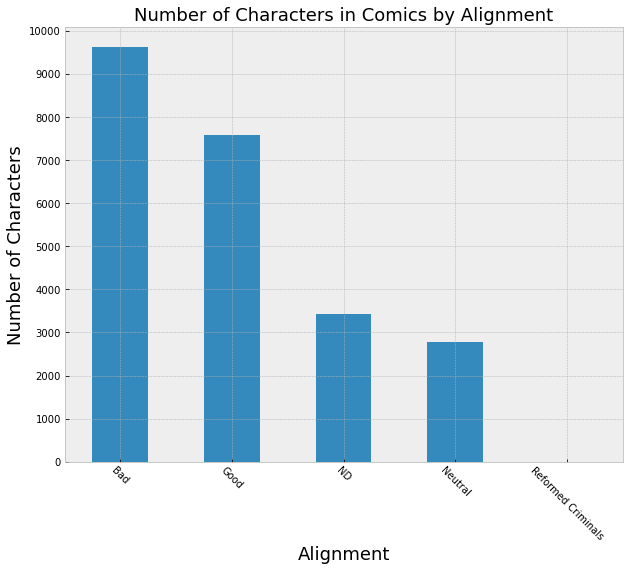

In [4]:
#Let's explore the file a bit...can we find out how many characters are heroes, villans, or others?
character_count = superheroes["ALIGN"].value_counts()
print("List of character alignments:")
print(character_count)
#this is the character count by their alignment in a bar chart
character_count.plot(kind="bar", subplots=True, figsize = (10,8), fontsize=10)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.xticks(rotation = -45)
plt.title("Number of Characters in Comics by Alignment", fontsize = 18)
plt.ylabel("Number of Characters", fontsize=18)
plt.xlabel("Alignment", fontsize=18)

plt.show()

Though the bar graph is informative, knowing the percentages of the alignments of characters within the comic book universe(s) would be a bit easier to understand than trying to figure what number does the bar graph sit at. 

Because the actual numbers for many of the bad and good characters were very high, I am adding an additional note to how the ratios are defined by included two decimal points to give a more specific answer. 

In [5]:
def my_autopct(pct):
    if pct > 0:
        return ("%1.2f%%" % pct)
    else:
        return " "

List of Character Alignments: 
Bad                   9616
Good                  7584
ND                    3438
Neutral               2779
Reformed Criminals       3
Name: ALIGN, dtype: int64


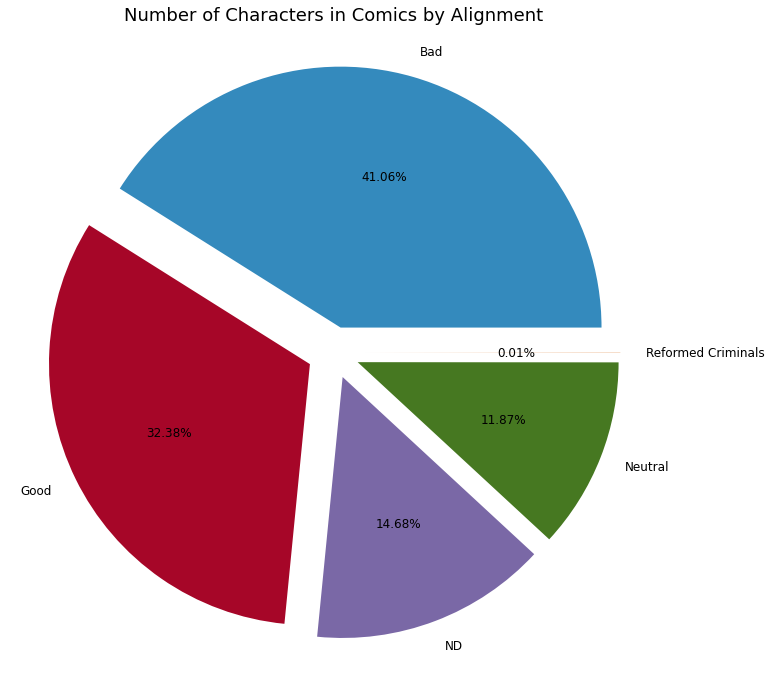

In [26]:
explode = (0.1,0.1,0.1,0.1,0.1)
character_count.plot(kind="pie", autopct=my_autopct, figsize=(18,12), explode = explode, fontsize=12)
plt.title("Number of Characters in Comics by Alignment", fontsize=18)
plt.ylabel('')
print("List of Character Alignments: ")
print(character_count)

plt.show()

Of the 23,420 characters from the Marvel and DC Universe, 41.06% of them are "Bad", maybe even a "Villian." We can also see that 32.38% of the characters are "Good," and that could mean they're a superhero, but it could also just mean they're part of the Superhero posse. 


In [7]:
female_count = superheroes.drop(superheroes[superheroes.SEX != "Female"].index)
print("Total Number of Female Characters:" + " " + str(len(female_count)))

Total Number of Female Characters: 5853


So there's only *5853* female characters out of 23,420 characters total. 

In [8]:
sex_NDcount = superheroes.drop(superheroes[superheroes.SEX != "ND"].index)
print("Total Number of Characters without SEX identified:" + " " + str(len(sex_NDcount)))


Total Number of Characters without SEX identified: 978


Now that we know that there are only 978 characters out of 23,420 that we do not know the sex of, we're going to look at a breakdown of all the characters by their sex and see what kind of data that we get. 

Total Number of Characters: 23420
Breakdown of Characters by Sex:
Male           16521
Female          5853
ND               978
Agender           45
Genderless        20
Genderfluid        2
Transgender        1
Name: SEX, dtype: int64


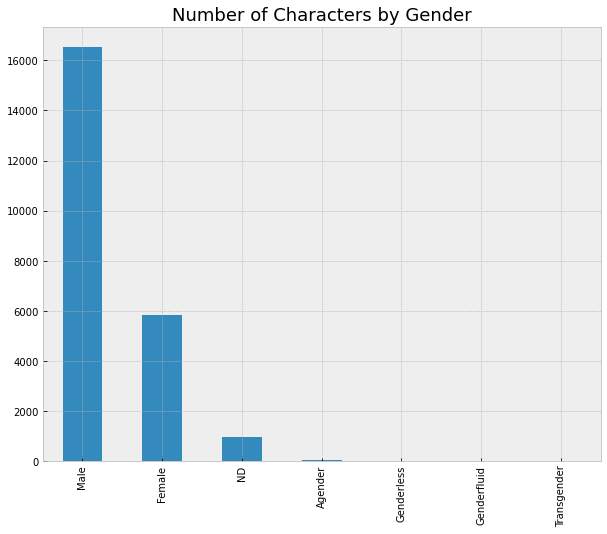

In [27]:
sex_count = superheroes["SEX"].value_counts()
print("Total Number of Characters:" + " " + str(len(superheroes)))
print("Breakdown of Characters by Sex:")
print(sex_count)

sex_count.plot(kind="bar", subplots=True, figsize = (10,8), fontsize=10)
plt.title("Number of Characters by Gender", fontsize=18)
plt.ylabel('')

plt.show()

There is an overwhelming number of male characters in comicbooks. From the chart, you can see that ther are only a few number of characters that identify as Agender, Genderless, Genderfluid, and Transgender. The question I now want to ask of the data is what are the alignments of these characters by their gender? 

What I did was create a crosstab that compared and sorted the characters' gender by their alignment. 

In [10]:
align_by_sex = pd.crosstab(superheroes["SEX"], superheroes["ALIGN"])
align_by_sex

ALIGN,Bad,Good,ND,Neutral,Reformed Criminals
SEX,,,,,
Agender,20,10,2,13,0
Female,1573,2528,914,837,1
Genderfluid,0,1,0,1,0
Genderless,11,6,0,3,0
Male,7562,4888,2265,1804,2
ND,449,151,257,121,0
Transgender,1,0,0,0,0


I decided to drop the ND points from both the Alignment and Sex as the data only tells us there are a good chunk of characters where we do not know their alignment or their gender. 
After removing the ND from both areas, I also decided to remove the values that were very small to drill down further on the larger chunks of data. 

Knowing characters that are under-represented is **extremely** important, however for the purposes of this project, we are not looking into that. 

In [11]:
#cool cool cool, let's get a little deeper and get rid of the ND points and the low data points
align_NDless = superheroes.drop(superheroes[superheroes.ALIGN == "ND"].index)
align_sex_NDless = align_NDless.drop(align_NDless[align_NDless.SEX == "ND"].index)
alignbysex_fluidless = align_sex_NDless.drop(align_sex_NDless[align_sex_NDless.SEX == "Genderfluid"].index)
alignbysex_transless = alignbysex_fluidless.drop(alignbysex_fluidless[alignbysex_fluidless.SEX == "Transgender"].index)
alignbysex_noRC = alignbysex_transless.drop(alignbysex_transless[alignbysex_transless.ALIGN == "Reformed Criminals"].index)
align_by_sex = pd.crosstab(alignbysex_noRC["SEX"], alignbysex_noRC["ALIGN"])

align_by_sex

ALIGN,Bad,Good,Neutral
SEX,,,
Agender,20,10,13
Female,1573,2528,837
Genderless,11,6,3
Male,7562,4888,1804


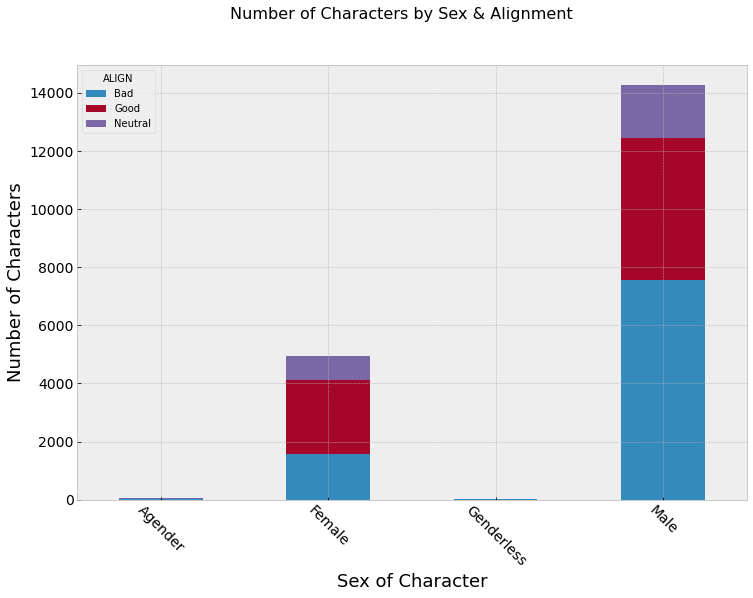

In [12]:
align_by_sex.plot(kind = "bar", stacked = True, subplots = False, figsize=(12,8), fontsize = 14)

plt.suptitle("Number of Characters by Sex & Alignment", fontsize = 16)
plt.xticks(rotation=-45)
plt.ylabel("Number of Characters", fontsize=18)
plt.xlabel("Sex of Character", fontsize =18)

plt.show()

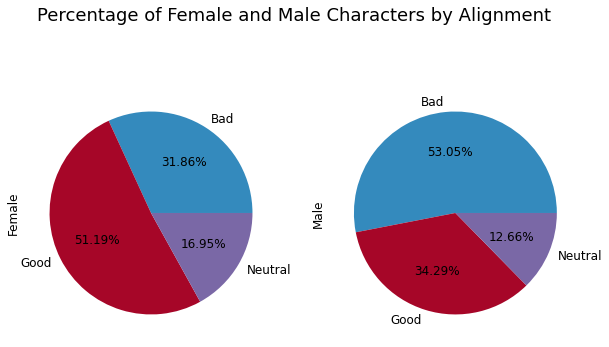

In [13]:
sex_dropag = alignbysex_noRC.drop(alignbysex_noRC[alignbysex_noRC.SEX == "Agender"].index)
sex_dropgl = sex_dropag.drop(sex_dropag[sex_dropag.SEX == "Genderless"].index)
sex_by_align = pd.crosstab(sex_dropgl["ALIGN"], sex_dropgl["SEX"])
sex_by_align.plot(kind="pie", autopct=my_autopct, subplots=True, figsize=(10,6), fontsize = 12, legend=False,)
plt.suptitle("Percentage of Female and Male Characters by Alignment", fontsize=18)

plt.show()

## What does this data and the chart tell us?
Well, what we see is that though there is a higher number of male characters overall, when you compare the alignment of male characters to female characters, the percentage of Good Female Characters is **51.19%** while the percentage of Good Male Characters is **34.29%**. And you'll also see tht the percentage of Bad Male Characters is higher **(53.05%)** compared to Bad Female Characters **(31.86%)**. 

What is interesting about this allotment of alignment characteristics is that even though female characters occur less in comicbooks than male characters, more than the majority of thos female characters are "good." Because we also dropped the "ND" of both sexes, it is important to consider that for the female characters, there could be a shift on whether or not "Good" is actually the majority, but we would need to know what the actual alignment for those characters are. 

For the male characters, more than the majority is "Bad" and only roughly 34% of the male characters are good. Because female comicbook characters are a newer introduction the comicbook world, I wonder if there are some stereotypes happening with why such a large percentage of the characters are "good?" 

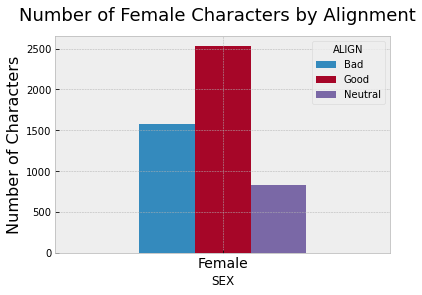

In [14]:
alignsex_female = alignbysex_noRC.drop(alignbysex_noRC[alignbysex_noRC.SEX != "Female"].index)
alignsex = pd.crosstab(alignsex_female["SEX"], alignsex_female["ALIGN"])
alignsex.plot(kind = "bar")
plt.suptitle("Number of Female Characters by Alignment", fontsize=18)
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 10)
plt.ylabel("Number of Characters", fontsize = 16)


plt.show()

# Finding a Time

The next part of my data query was looking to see what was the occurrence of female characters by their month of introduction. I went ahead and removed the "ND" from the file regarding the month because it would just tell us how many characters we didn't know. 

This query included narrowing down the data only to female characters, which I did using the "drop" method. I also created a crosstab again to find the number of occurrences by their month, and sorted that information from highest to lowest. 

In [15]:
females_only = superheroes.drop(superheroes[superheroes.SEX != "Female"].index)
fem_firstmonth_NDless = females_only.drop(females_only[females_only.FIRST_MONTH == "ND"].index)
females_by_firstmonth = pd.crosstab(fem_firstmonth_NDless["FIRST_MONTH"], ["SEX"])
females_by_firstmonth.sort_values(['SEX'], ascending = False, inplace = True)
females_by_firstmonth.columns = ["Females Only"]
females_by_firstmonth


,Females Only
FIRST_MONTH,
August,540
September,517
December,507
October,493
November,482
June,481
January,464
July,457
February,437


What the data shows us is that the fall and winter months tend to have more female character introductions. What does that mean? I'm not really sure, but the range of introductions start at 380 for April and up to 540 for August. I discarded the Holiday because there is only one singular event that is considered Holiday, but I don't know what Holiday that stands for. 

From this data, I decided to ask the question of what the alignments of the characters were in the months they first appeared. I decided to use a "groupby" method to organize and sort the data between the month of first appearances as well as the character alignments. The data can be found both in the table below as well as the bar chart below that. The bar chart gives a better visual representation of how many characters of an alignment first appeared in that month. 

In [16]:
align_rcless = fem_firstmonth_NDless.drop(fem_firstmonth_NDless[fem_firstmonth_NDless.ALIGN == "Reformed Criminals"].index)
firstmonth_holidayless = align_rcless = align_rcless.drop(align_rcless[align_rcless.FIRST_MONTH == "Holiday"].index)
align_monthfemales = firstmonth_holidayless.groupby(["ALIGN", "FIRST_MONTH"])["FIRST_MONTH"].count().unstack().fillna(0).astype(int)
align_monthfemales

FIRST_MONTH,April,August,December,February,January,July,June,March,May,November,October,September
ALIGN,,,,,,,,,,,,
Bad,89,161,131,116,128,128,152,104,113,124,137,140
Good,168,223,221,196,198,195,201,171,163,203,208,235
ND,70,82,97,65,71,51,58,76,64,88,74,80
Neutral,53,74,58,60,67,83,70,62,61,67,74,62


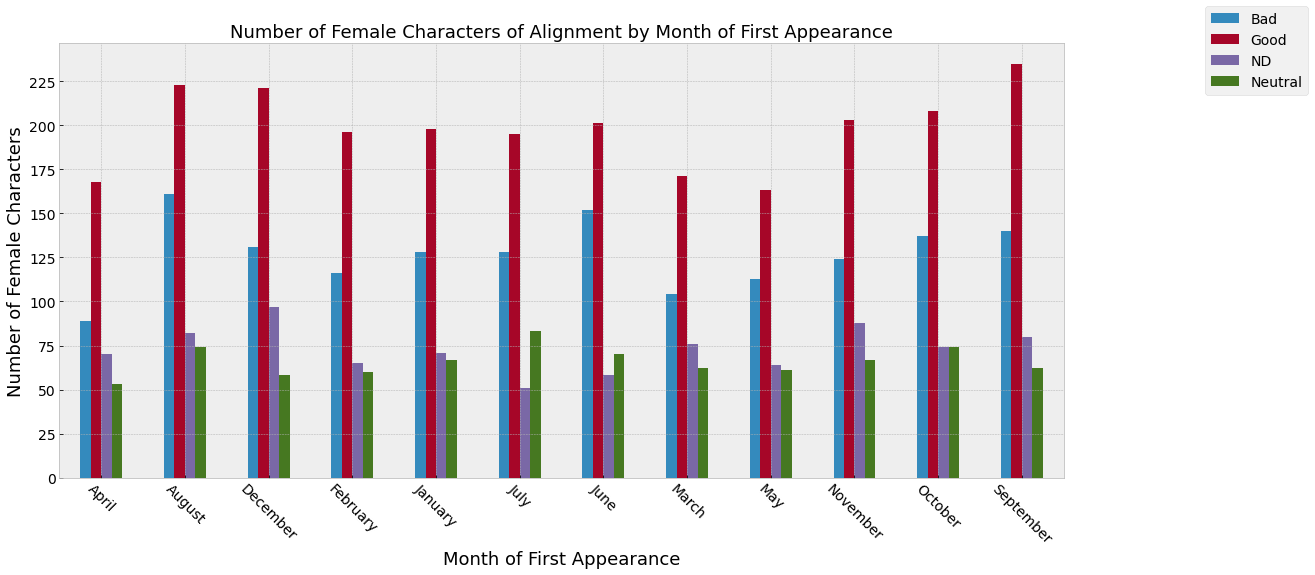

In [17]:
females_by_month = firstmonth_holidayless.groupby(["FIRST_MONTH", "ALIGN"])["ALIGN"].count().unstack().fillna(0).astype(int)
females_by_month.plot(kind = "bar", figsize=(18,8))

plt.legend(bbox_to_anchor=(1.25, 1.10), loc="upper right", fontsize=14)
plt.title("Number of Female Characters of Alignment by Month of First Appearance", fontsize=18)
plt.ylabel("Number of Female Characters", fontsize=18)
plt.xlabel("Month of First Appearance", fontsize=18)
plt.xticks(rotation=-45, fontsize=14)
plt.yticks([0,25,50,75,100,125,150,175,200,225],fontsize=14)

plt.show()


Again, we already know that a majority of the female characters are in the "good" alignment. Whhat we can also see is that even though August has the highest number of female introductions, September has the higher number of "GOOD" female character introductions, though August is a close second. We do see that August does have the highest number of "BAD" female character introductions, so again, these higher numbers occur in the fall months. 

# What Year is it? 

I also wanted to explore which year had the highest number of female introductions. Now this year count is not how many appearances there have been by female characters, but simply which year had the highest number of female character introductions. 
I continued to use the baby data frames that I created using the drop method that included only the female characters and then created a cross tab between the year of first appearance and their "sex" even though it was only females anyways. I was then able to sort them by the highest number of introductions within a year and just chose to find the first 5 years. 


In [18]:
femfirstyear = pd.crosstab(firstmonth_holidayless["FIRST_YEAR"], ["SEX"])
femfirstyear.sort_values(by="SEX", ascending=False, inplace=True)
femfirstyear.columns = ["Females Only"]
femfirstyear.head()

,Females Only
FIRST_YEAR,
2006,201
1994,187
2010,184
1993,181
2008,175


This next section was really looking at just 2006, since it had the highest number of female character introductions. What I did was drop all the other years except for 2006, and drilled down on some of the previous questions I had asked earlier but within the parameters of 2006. What we have is both a table of the alignment and the month in which these characters first appeared as well as a bar chart. The chart again can visually tell us that September had a good showin with how many "Good" Female Characters were introduced as well as that October in 2006 had the highest number of "Bad" character introductions. A note on the data is that because I dropped the ND for the months, there is a discrepency between how many characters there were in the 2006 count and how many there are in the table below. 

In [19]:
femfirstyear_ohsix = firstmonth_holidayless.drop(firstmonth_holidayless[firstmonth_holidayless.FIRST_YEAR != "2006"].index)
femfirstmonth_ohsix = femfirstyear_ohsix.groupby(["ALIGN", "FIRST_MONTH"])["FIRST_MONTH"].count().unstack().fillna(0).astype(int)

femfirstmonth_ohsix


FIRST_MONTH,April,August,December,February,January,July,June,March,May,November,October,September
ALIGN,,,,,,,,,,,,
Bad,0,0,7,4,5,3,3,1,2,2,8,5
Good,6,5,5,4,11,9,11,7,7,4,9,22
ND,0,4,2,5,9,1,1,1,6,2,0,5
Neutral,1,3,1,3,0,2,3,1,5,2,2,2


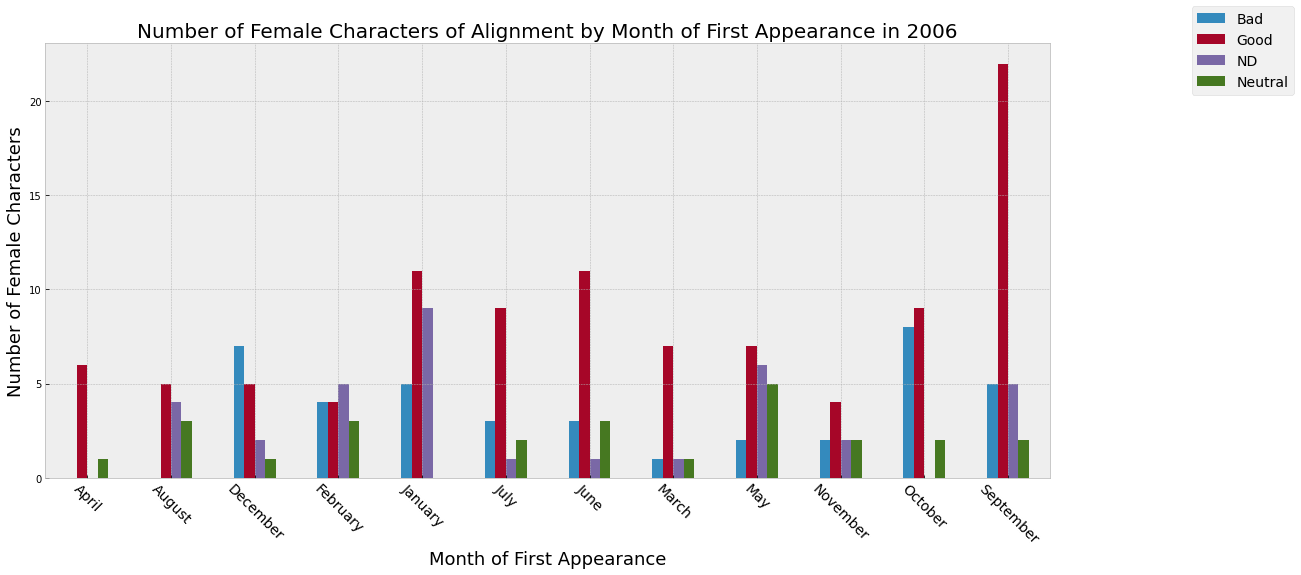

In [20]:
femfirstmonth_ohsix = femfirstyear_ohsix.groupby(["FIRST_MONTH", "ALIGN"])["ALIGN"].count().unstack().fillna(0).astype(int)
femfirstmonth_ohsix.plot(kind = "bar", figsize=(18,8))

plt.legend(bbox_to_anchor=(1.25, 1.10), loc="upper right", fontsize=14)
plt.title("Number of Female Characters of Alignment by Month of First Appearance in 2006", fontsize=20)
plt.ylabel("Number of Female Characters", fontsize=18)
plt.xlabel("Month of First Appearance", fontsize=18)
plt.xticks(rotation=-45, fontsize=14)


plt.show()

The table below is really looking at the top ten female characters that appeared the most in 2006. So this information is going away from the month and looking at number of appearances. Within the top ten, there is a fairly even split between which universe those characters come from, but the top three spots do all belong to Marvel female characters. 

The top character with the most appearances in 2006 is actually Danielle Cage, the daughter of Jessica Jones and Luke Cage from the Marvel Universe. Interesting enough, when I tried to find information regarding this specific Danielle Cage (from Earth-616), most of her appearances were as a child being babysat by multiple different Marvel characters. 

<div>
    <img src="https://s3.amazonaws.com/comicgeeks/characters/avatars/1645.jpg?t=1604098501" />
    </div>

Also, Thanks to Patrick & Samantha from CIS340 for helping me figure out this part of sorting below!

In [21]:
femfy_appearanceNDless = femfirstyear_ohsix.drop(femfirstyear_ohsix[femfirstyear_ohsix.APPEARANCES == "ND"].index)
femfy_appearanceNDless["APPEARANCES"] = femfy_appearanceNDless["APPEARANCES"].astype(int)
femfy_appearanceNDless.sort_values(by="APPEARANCES", ascending=False, inplace=True)
 

femfy_appearanceNDless.head(10)


,UNIVERSE,page_id,name,urlslug,ID,ALIGN,IS_AVENGER,AVENGER_STATUS,AVENGER_YEAR,EYES,HAIR,SEX,SEXUALITY,ALIVE,APPEARANCES,FIRST_MONTH,FIRST_YEAR,DECEASED,RESURRECTED
14117,MARVEL,ND,Danielle Cage (Earth-616),Danielle_Cage_(Earth-616),No Dual Identity,Good,NO,ND,ND,Green Eyes,Black Hair,Female,Heterosexual,Living,84,March,2006,ND,ND
22534,MARVEL,ND,Criti Noll (Clone) (Earth-616),Criti_Noll_(Clone)_(Earth-616),Secret Identity,Bad,NO,ND,ND,Green Eyes,No Hair,Female,Heterosexual,Deceased,68,September,2006,ND,ND
20773,MARVEL,ND,Venus (Siren) (Earth-616),Venus_(Siren)_(Earth-616),Secret Identity,Good,NO,ND,ND,Blue Eyes,Blond Hair,Female,Heterosexual,Living,61,October,2006,ND,ND
12070,DC,8883,Katherine Kane (New Earth),Katherine_Kane_(New_Earth),Secret Identity,Good,NO,ND,ND,Green Eyes,Red Hair,Female,Homosexual,Living,51,June,2006,ND,ND
2773,DC,11189,Iolande (New Earth),Iolande_(New_Earth),Public Identity,Good,NO,ND,ND,Purple Eyes,Black Hair,Female,Heterosexual,Living,48,August,2006,ND,ND
8507,MARVEL,ND,Sally Floyd (Earth-616),Sally_Floyd_(Earth-616),No Dual Identity,ND,NO,ND,ND,Brown Eyes,Black Hair,Female,Heterosexual,Living,41,January,2006,ND,ND
6597,DC,91760,Brenda Del Vecchio (New Earth),Brenda_Del_Vecchio_(New_Earth),Public Identity,Good,NO,ND,ND,Brown Eyes,Red Hair,Female,Heterosexual,Living,40,February,2006,ND,ND
15894,MARVEL,ND,Elloe Kaifi (Earth-616),Elloe_Kaifi_(Earth-616),Public Identity,ND,NO,ND,ND,Red Eyes,Black Hair,Female,Heterosexual,Living,38,May,2006,ND,ND
15918,DC,10267,Adrianna Tomaz (New Earth),Adrianna_Tomaz_(New_Earth),Public Identity,Neutral,NO,ND,ND,Brown Eyes,Brown Hair,Female,Heterosexual,Deceased,38,May,2006,ND,ND
18860,DC,12013,Amy Allen (New Earth),Amy_Allen_(New_Earth),Secret Identity,Neutral,NO,ND,ND,Blue Eyes,Brown Hair,Female,Heterosexual,Living,37,November,2006,ND,ND


With the above data giving me some information about specific characters, I also decided to add in a part about the number of Marvel characters and DC characters that appeared in 2006. I did do a drop method and created to baby data sets to only have either DC characters or Marvel characters and then basically did a groupby method to compare the two and create a pie chart. What you find here is that there are a higher number of Marvel female characters introduced in 2006, and a higher percentage of them are also in the "Good" Alignment. 

What I would've liked to do is explore perhaps this alignment aspect of the characters within their Universe as well as how different genders are presented within them. 

Total Number of DC Female Characters introduced in 2006: 93
Total Number of Marvel Female Characters introduced in 2006: 97
UNIVERSE  DC  MARVEL
ALIGN               
Bad       22      16
Good      39      53
ND        18      17
Neutral   14      11


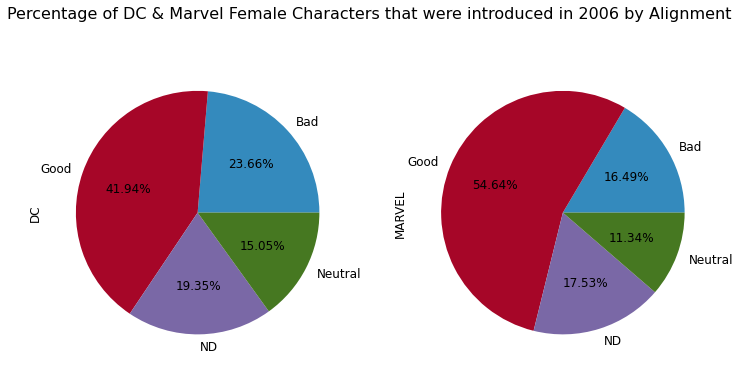

In [22]:
align_by_dc = femfy_appearanceNDless.drop(femfy_appearanceNDless[femfy_appearanceNDless.UNIVERSE == "MARVEL"].index)
align_by_marvel = femfy_appearanceNDless.drop(femfy_appearanceNDless[femfy_appearanceNDless.UNIVERSE == "DC"].index)

print("Total Number of DC Female Characters introduced in 2006:" + " " + str(len(align_by_dc)))
print("Total Number of Marvel Female Characters introduced in 2006:" + " " +  str(len(align_by_marvel)))
align_by_uni = femfy_appearanceNDless.groupby(["ALIGN", "UNIVERSE"])["UNIVERSE"].count().unstack().fillna(0).astype(int)
print(align_by_uni)

align_by_uni.plot(kind="pie", autopct=my_autopct, subplots=True, figsize=(12,6), fontsize = 12, legend=False,)
plt.suptitle("Percentage of DC & Marvel Female Characters that were introduced in 2006 by Alignment", fontsize=16)

plt.show()

That's all folks! This was a fun journey to explore the data set given here and find what types of information can be gleaned from it. 

# So What is there to know?

Honestly, I just had a lot of fun exploring the types of questions I could ask of the data and using a "stream of consciousness" type of process in creating follow up questions. The most difficult part in this is the same idea that Ira Glass talks about in that there is a gap between what you want to do and being able to do it. In this, if I had more time to dedicate to exploring the data and making this project extremely long, I could have probably figured out more questions to ask and better ways to ask them. 

But what I did find is that there is definitely an overwhelming number of male characters. The fact that the highest female character introductions was in 2006 is a bit telling as that is over 10 years ago. There are a higher number of "Good" female characters than male characters, and you have to ask is there a reason for that? The data also showed that the Fall months tended to favor female character introductions. Of course, I didn't really look at the other genders to compare whether they were also introduced in the fall months, but I think that would be an interesting data point to explore.

A whole heaping of thanks to Wendy Norris, my instructor for CIS340, for giving us this fun project to do, but also some of the skeleton and framework for what I hoped to accomplish. 
Thanks again to Samantha and Patrick from class regarding the sorting of the appearances. 
Thanks to fivethirtyeight.com for providing the data set. 
And thanks to my friends Jordan and Andy for talking with me through some of the harder concepts I was trying to figure out. 
Thanks to https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python for the help in figuring out some of the graph sizing because when you can see the pie chart but can't read the labels, that isn't very helpful. 
Shout out to https://matplotlib.org/3.2.1/gallery/index.html#axes-grid for the help with finding the color scheme and types of graphs to use. 
Thanks to https://marvel.fandom.com/wiki/Danielle_Cage_(Earth-616)?file=Danielle_Cage_%2528Earth-616%2529_from_Power_Man_and_Iron_Fist_Vol_3_3_001.png for the picture of Dani Cage.
Shout out to https://www.mycomicshop.com/ for the image of DC vs. Marvel characters. 